# Optimization with equality constraints

In [1]:
import math
import numpy as np
from scipy import optimize as opt

maximize $.4\,\log(x_1)+.6\,\log(x_2)$ s.t. $x_1+3\,x_2=50$.

In [2]:
I = 50
p = np.array([1, 3])

In [3]:
U = lambda x: (.4*math.log(x[0])+.6*math.log(x[1]))

In [6]:
x0 = (I/len(p))/np.array(p)

In [8]:
budget = ({'type': 'eq', 'fun': lambda x: I-np.sum(np.multiply(x, p))})

In [9]:
opt.minimize(lambda x: -U(x), x0, method='SLSQP', constraints=budget, tol=1e-08, 
                       options={'disp': True, 'ftol': 1e-08})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.5798439652115133
            Iterations: 8
            Function evaluations: 32
            Gradient evaluations: 8


     fun: -2.5798439652115133
     jac: array([-0.01999989, -0.06000018])
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([20.00008839,  9.99997054])

In [16]:
def consumer(U, p, I):
    budget = ({'type': 'eq', 'fun': lambda x: I-np.sum(np.multiply(x, p))})
    x0 = (I/len(p))/np.array(p)
    sol = opt.minimize(lambda x: -U(x), x0, method='SLSQP', constraints=budget, tol=1e-08, 
                       options={'disp': False, 'ftol': 1e-08})
    if sol.status == 0:
        return {'x': sol.x, 'V': -sol.fun, 'MgU': -sol.jac, 'mult': -sol.jac[0]/p[0]}
    else:
        return 0

In [19]:
consumer(U, p, I)

{'MgU': array([0.01999989, 0.06000018]),
 'V': 2.5798439652115133,
 'mult': 0.01999989151954651,
 'x': array([20.00008839,  9.99997054])}

In [14]:
delta=.01

In [17]:
(consumer(U, p, I+delta)['V']-consumer(U, p, I-delta)['V'])/(2*delta)

0.020000000351583225

In [ ]:
delta=.001

In [20]:
numerador = (consumer(U,p+np.array([delta, 0]), I)['V']-consumer(U,p+np.array([-delta, 0]), I)['V'])/(2*delta)

In [21]:
denominador = (consumer(U, p, I+delta)['V']-consumer(U, p, I-delta)['V'])/(2*delta)

In [22]:
-numerador/denominador

20.000666372514335

## Cost function

In [23]:
# Production function
F = lambda x: (x[0]**.8)*(x[1]**.2)

In [24]:
w = np.array([5, 4])

In [25]:
y = 1

In [26]:
constraint = ({'type': 'eq', 'fun': lambda x: y-F(x)})

In [30]:
x0 = np.array([.5, .5])

In [31]:
cost = opt.minimize(lambda x: w@x, x0, method='SLSQP', constraints=constraint, tol=1e-08, 
                       options={'disp': True, 'ftol': 1e-08})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.886966805999761
            Iterations: 8
            Function evaluations: 33
            Gradient evaluations: 8


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [33]:
F(cost.x)

0.9999999999996633

In [34]:
cost

     fun: 7.886966805999761
     jac: array([5., 4.])
 message: 'Optimization terminated successfully.'
    nfev: 33
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([1.26191469, 0.39434834])

## Exercise

In [15]:
a = 2
u = lambda c: -np.exp(-a*c)

In [37]:
R = 2
Z2 = np.array([.72, .92, 1.12, 1.32])
Z3 = np.array([.86, .96, 1.06, 1.16])

In [57]:
def U(x):
    states = len(Z2)*len(Z3)
    U = u(x[0])
    
    for z2 in Z2:
        for z3 in Z3:
            U += (1/states)*u(x[1]*R+x[2]*z2+x[3]*z3)
    
    return U

In [35]:
p = np.array([1, 1, .5, .5])
I = 4

In [39]:
# a=1
consumer(U, p, I)

{'MgU': array([0.08731231, 0.08730633, 0.04365353, 0.04365407]),
 'V': -0.13096546963056768,
 'mult': 0.08731230534613132,
 'x': array([2.43826386, 0.96156249, 0.40056072, 0.79978658])}

In [55]:
# a=5
consumer(U, p, I)

{'MgU': array([1.46733761e-05, 1.62503376e-05, 6.30933317e-06, 7.55005789e-06]),
 'V': -4.5597092009686085e-06,
 'mult': 1.467337608573871e-05,
 'x': array([ 2.54778275, -0.03185392,  1.48407021,  1.48407214])}

In [58]:
# a=2
consumer(U, p, I)

{'MgU': array([0.01213578, 0.01212819, 0.00606456, 0.00606509]),
 'V': -0.009099936642525175,
 'mult': 0.012135779834352434,
 'x': array([2.55237217, 1.15077956, 0.19958579, 0.39411074])}

In [3]:
import matplotlib.pyplot as plt

In [6]:
x = np.arange(0.0, 2.0, 0.01)

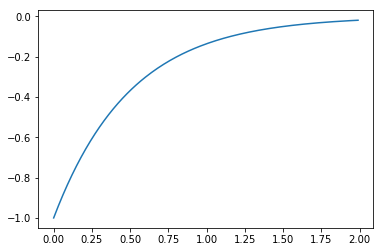

In [12]:
a = 2
u = lambda c: -np.exp(-a*c)
plt.plot(x, u(x))

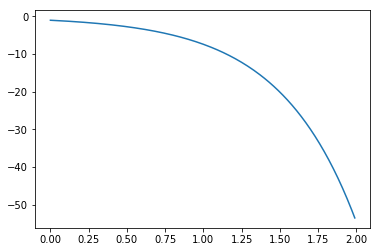

In [16]:
a = -2
plt.plot(x, u(x))

# Optimization with inequality constraints

In [13]:
f = lambda x: -x[0]**3+x[1]**2-2*x[0]*(x[2]**2)

In [8]:
constraints =({'type': 'eq', 'fun': lambda x: 2*x[0]+x[1]**2+x[2]-5}, 
              {'type': 'ineq', 'fun': lambda x: 5*x[0]**2-x[1]**2-x[2]-2})

In [10]:
constraints =({'type': 'eq', 'fun': lambda x: x[0]**3-x[1]})

In [18]:
x0 = np.array([.5, .5, 2])
opt.minimize(f, x0, method='SLSQP', constraints=constraints, tol=1e-08, 
                       options={'disp': True, 'ftol': 1e-08})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -19.000000000000256
            Iterations: 11
            Function evaluations: 56
            Gradient evaluations: 11


     fun: -19.000000000000256
     jac: array([-21.,   0., -12.])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([ 1.0000000e+00, -2.6438182e-09,  3.0000000e+00])